In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
train, test = pd.read_csv('train.csv'), pd.read_csv('test.csv')
train.columns
# Basic information
print("Train shape:", train.shape)
print("\nTest shape:", test.shape)
print("\nColumns:", train.columns.tolist())
print("\nMissing values:\n", train.isnull().sum())
print("\nData types:\n", train.dtypes)

Train shape: (300000, 11)

Test shape: (200000, 10)

Columns: ['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price']

Missing values:
 id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

Data types:
 id                        int64
Brand                    object
Material                 object
Size                     object
Compartments            float64
Laptop Compartment       object
Waterproof               object
Style                    object
Color                    object
Weight Capacity (kg)    float64
Price                   float64
dtype: object


In [30]:
# Perform dummy encoding on the 'Material' column
columns = train.select_dtypes(include=['object']).columns
train, test = pd.get_dummies(train, columns=columns), pd.get_dummies(test, columns=columns)
train.columns


Index(['id', 'Compartments', 'Weight Capacity (kg)', 'Price', 'Brand_Adidas',
       'Brand_Jansport', 'Brand_Nike', 'Brand_Puma', 'Brand_Under Armour',
       'Material_Canvas', 'Material_Leather', 'Material_Nylon',
       'Material_Polyester', 'Size_Large', 'Size_Medium', 'Size_Small',
       'Laptop Compartment_No', 'Laptop Compartment_Yes', 'Waterproof_No',
       'Waterproof_Yes', 'Style_Backpack', 'Style_Messenger', 'Style_Tote',
       'Color_Black', 'Color_Blue', 'Color_Gray', 'Color_Green', 'Color_Pink',
       'Color_Red'],
      dtype='object')

In [31]:
train.head(2)

,id,Compartments,Weight Capacity (kg),Price,Brand_Adidas,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Canvas,...,Waterproof_Yes,Style_Backpack,Style_Messenger,Style_Tote,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0,7.0,11.611723,112.15875,False,True,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,1,10.0,27.078537,68.88056,False,True,False,False,False,True,...,True,False,True,False,False,False,False,True,False,False


In [32]:
from sklearn.impute import KNNImputer
# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=25)
# Apply the imputer to the DataFrame
train = pd.DataFrame(imputer.fit_transform(train), columns=train.columns)
print("\nMissing values:\n", train.isnull().sum())


Missing values:
 id                        0
Compartments              0
Weight Capacity (kg)      0
Price                     0
Brand_Adidas              0
Brand_Jansport            0
Brand_Nike                0
Brand_Puma                0
Brand_Under Armour        0
Material_Canvas           0
Material_Leather          0
Material_Nylon            0
Material_Polyester        0
Size_Large                0
Size_Medium               0
Size_Small                0
Laptop Compartment_No     0
Laptop Compartment_Yes    0
Waterproof_No             0
Waterproof_Yes            0
Style_Backpack            0
Style_Messenger           0
Style_Tote                0
Color_Black               0
Color_Blue                0
Color_Gray                0
Color_Green               0
Color_Pink                0
Color_Red                 0
dtype: int64


In [33]:
train.head()

,id,Compartments,Weight Capacity (kg),Price,Brand_Adidas,Brand_Jansport,Brand_Nike,Brand_Puma,Brand_Under Armour,Material_Canvas,...,Waterproof_Yes,Style_Backpack,Style_Messenger,Style_Tote,Color_Black,Color_Blue,Color_Gray,Color_Green,Color_Pink,Color_Red
0,0.0,7.0,11.611723,112.15875,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,10.0,27.078537,68.88056,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,2.0,16.643760,39.17320,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.0,8.0,12.937220,80.60793,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.0,1.0,17.749338,86.02312,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


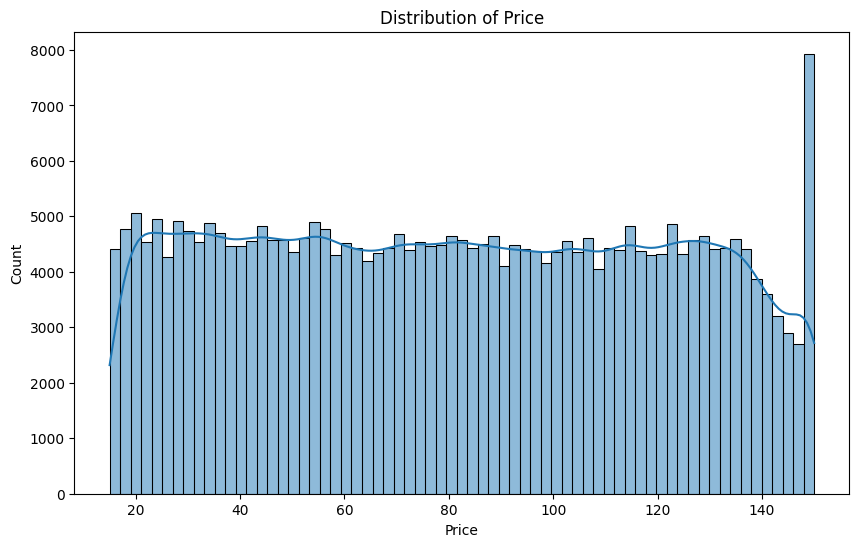

In [34]:
# Distribution of target variable (Price)
plt.figure(figsize=(10, 6))
sns.histplot(train['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

In [35]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
 
test = test.drop(columns='id')
# LightGBM
def train_lightgbm(X, y):
    lgb_model = LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.01,
        num_leaves=31,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
    
    scores = cross_val_score(lgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f'LightGBM RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})')
    
    return lgb_model
from sklearn.preprocessing import StandardScaler
# Prepare the data
X = train.drop(['Price', 'id'], axis=1)
y = train['Price']

# Scale numerical features
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
lgb_model = train_lightgbm(X, y)
lgb_model.fit(X, y)
y_pred_lgb = lgb_model.predict(test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009389 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Info] Start training from score 81.474972
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Info] Start training from score 81.369008
[LightGBM] [Warning] Found

In [36]:
test['Price'] = y_pred_lgb

Training final model:   0%|          | 0/947 [23:24<?, ?it/s]


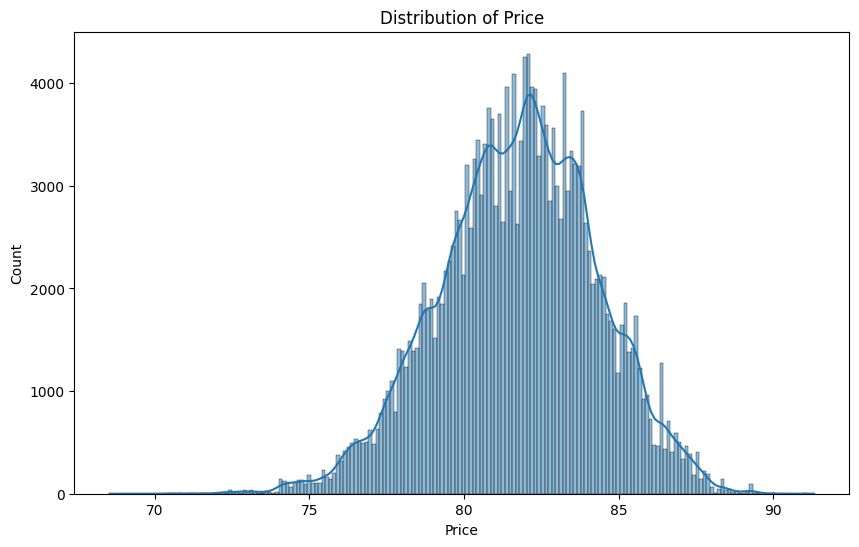

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(test['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

In [38]:
sample = pd.read_csv('sample_submission.csv')
sample['Price'] = test['Price']
sample.to_csv('sample_submission_dummy_encode.csv', index = False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Info] Start training from score 81.448481


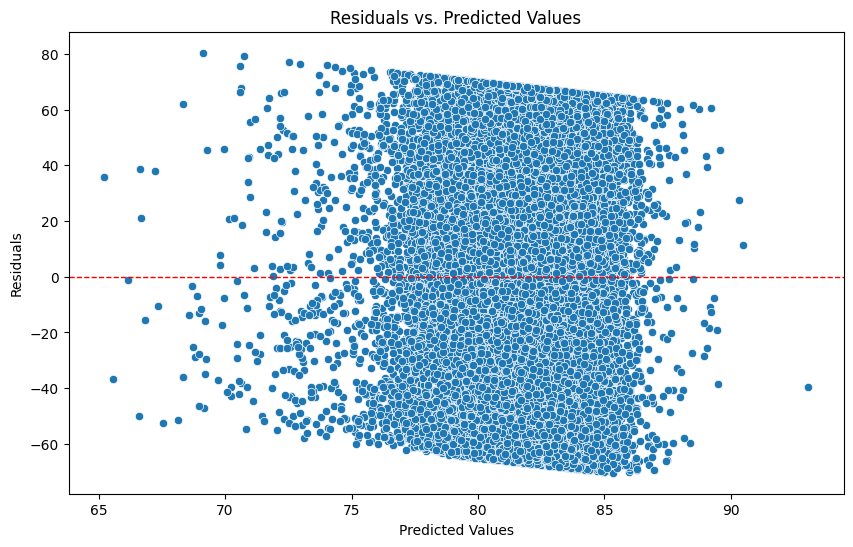

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Split the data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
lgb_model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = lgb_model.predict(X_valid)

# Calculate residuals
residuals = y_valid - y_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()
#lets see if is  homoscedasticity

In [40]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.4f}')
test=test.drop(columns='Price')

RMSE: 38.9213


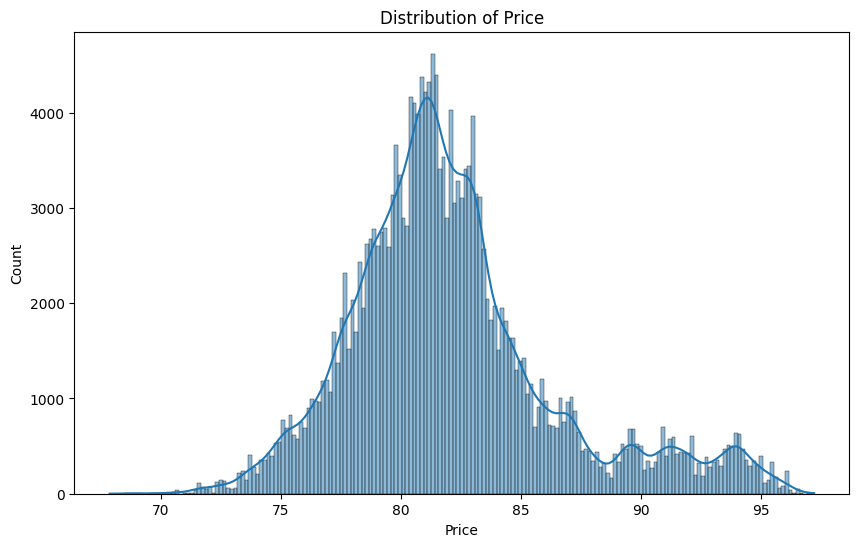

In [41]:
y_pred = lgb_model.predict(test)
test['Price'] = y_pred
plt.figure(figsize=(10, 6))
sns.histplot(test['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

In [42]:
sample = pd.read_csv('sample_submission.csv')
sample['Price'] = test['Price']
sample.to_csv('lgb_regressor.csv', index = False)

In [43]:
import optuna
from lightgbm import LGBMRegressor, early_stopping
from sklearn.metrics import mean_squared_error

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'random_state': 42
    }
    
    lgb_model = LGBMRegressor(**param)
    lgb_model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], callbacks=[early_stopping(stopping_rounds=100)])

    y_pred = lgb_model.predict(X_valid)
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
print("Best parameters:", best_params)

# Train the final model with the best parameters
lgb_model = LGBMRegressor(**best_params)
lgb_model.fit(X_train, y_train)

[I 2025-02-09 18:35:28,645] A new study created in memory with name: no-name-24e34676-907d-4ce9-ae53-9b7c11ddeefb
/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_b

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:30,183] Trial 0 finished with value: 38.914488897153284 and parameters: {'n_estimators': 964, 'learning_rate': 0.012799259178214277, 'num_leaves': 33, 'subsample': 0.632540691131732, 'colsample_bytree': 0.6405918870066105}. Best is trial 0 with value: 38.914488897153284.


Early stopping, best iteration is:
[299]	valid_0's l2: 1514.34


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1602]	valid_0's l2: 1514.47


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:38,632] Trial 1 finished with value: 38.91616332998021 and parameters: {'n_estimators': 1715, 'learning_rate': 0.0019240478832666008, 'num_leaves': 53, 'subsample': 0.5005588602290691, 'colsample_bytree': 0.5036216063171658}. Best is trial 0 with value: 38.914488897153284.
/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:39,757] Trial 2 finished with value: 38.916783365018276 and parameters: {'n_estimators': 1922, 'learning_rate': 0.019659125719879256, 'num_leaves': 47, 'subsample': 0.7189494066291043, 'colsample_bytree': 0.7222212099713402}. Best is trial 0 with value: 38.914488897153284.


Early stopping, best iteration is:
[221]	valid_0's l2: 1514.52


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:40,367] Trial 3 finished with value: 38.919859427646564 and parameters: {'n_estimators': 814, 'learning_rate': 0.03377130458503598, 'num_leaves': 33, 'subsample': 0.7328464177013244, 'colsample_bytree': 0.9983274812663614}. Best is trial 0 with value: 38.914488897153284.


Early stopping, best iteration is:
[72]	valid_0's l2: 1514.76
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1703]	valid_0's l2: 1514.55


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:45,473] Trial 4 finished with value: 38.91726968831762 and parameters: {'n_estimators': 1787, 'learning_rate': 0.002545170902945948, 'num_leaves': 36, 'subsample': 0.8674360925096183, 'colsample_bytree': 0.7560261663623375}. Best is trial 0 with value: 38.914488897153284.
/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:46,454] Trial 5 finished with value: 38.91464764423236 and parameters: {'n_estimators': 615, 'learning_rate': 0.03846892528631471, 'num_leaves': 53, 'subsample': 0.8314811040326167, 'colsample_bytree': 0.5720565709895589}. Best is trial 0 with value: 38.914488897153284.


Early stopping, best iteration is:
[75]	valid_0's l2: 1514.35


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:48,047] Trial 6 finished with value: 38.92197114230483 and parameters: {'n_estimators': 1531, 'learning_rate': 0.005895554519207788, 'num_leaves': 100, 'subsample': 0.9229686678664553, 'colsample_bytree': 0.8997782729387714}. Best is trial 0 with value: 38.914488897153284.


Early stopping, best iteration is:
[218]	valid_0's l2: 1514.92


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[441]	valid_0's l2: 1514.66


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:50,317] Trial 7 finished with value: 38.91865451609305 and parameters: {'n_estimators': 442, 'learning_rate': 0.0035489293015815754, 'num_leaves': 62, 'subsample': 0.6886423736666798, 'colsample_bytree': 0.6444640427530204}. Best is trial 0 with value: 38.914488897153284.
/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[955]	valid_0's l2: 1514.68


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:54,293] Trial 8 finished with value: 38.91892545756682 and parameters: {'n_estimators': 1765, 'learning_rate': 0.001966297131338334, 'num_leaves': 52, 'subsample': 0.5649705188666199, 'colsample_bytree': 0.7477185955877887}. Best is trial 0 with value: 38.914488897153284.
/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:54,775] Trial 9 finished with value: 38.91913335280038 and parameters: {'n_estimators': 1631, 'learning_rate': 0.09552344547594498, 'num_leaves': 28, 'subsample': 0.6892730281317305, 'colsample_bytree': 0.9080464692854431}. Best is trial 0 with value: 38.914488897153284.


Early stopping, best iteration is:
[46]	valid_0's l2: 1514.7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:56,929] Trial 10 finished with value: 38.91691048156796 and parameters: {'n_estimators': 1277, 'learning_rate': 0.010960786965984666, 'num_leaves': 77, 'subsample': 0.597446062352477, 'colsample_bytree': 0.6398537858601488}. Best is trial 0 with value: 38.914488897153284.


Early stopping, best iteration is:
[336]	valid_0's l2: 1514.53


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:57,979] Trial 11 finished with value: 38.91309980090935 and parameters: {'n_estimators': 807, 'learning_rate': 0.04463376606808165, 'num_leaves': 21, 'subsample': 0.8732315880187492, 'colsample_bytree': 0.5311645070966273}. Best is trial 11 with value: 38.91309980090935.


Early stopping, best iteration is:
[147]	valid_0's l2: 1514.23


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:58,910] Trial 12 finished with value: 38.909868683011446 and parameters: {'n_estimators': 1034, 'learning_rate': 0.07462723143776852, 'num_leaves': 25, 'subsample': 0.8108696031334028, 'colsample_bytree': 0.5024051668331645}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[99]	valid_0's l2: 1513.98


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:35:59,752] Trial 13 finished with value: 38.91413538298776 and parameters: {'n_estimators': 180, 'learning_rate': 0.07488646129939006, 'num_leaves': 21, 'subsample': 0.9713066284425143, 'colsample_bytree': 0.5142058134059451}. Best is trial 12 with value: 38.909868683011446.


Did not meet early stopping. Best iteration is:
[164]	valid_0's l2: 1514.31


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:00,924] Trial 14 finished with value: 38.9143406447725 and parameters: {'n_estimators': 1212, 'learning_rate': 0.04653102947754279, 'num_leaves': 21, 'subsample': 0.823770156070477, 'colsample_bytree': 0.5767376134684916}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[196]	valid_0's l2: 1514.33


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:02,778] Trial 15 finished with value: 38.915983820184266 and parameters: {'n_estimators': 733, 'learning_rate': 0.02104757772451841, 'num_leaves': 67, 'subsample': 0.7979301670020276, 'colsample_bytree': 0.570875167826566}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[251]	valid_0's l2: 1514.45


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:03,541] Trial 16 finished with value: 38.91439730889513 and parameters: {'n_estimators': 1128, 'learning_rate': 0.05313571905842623, 'num_leaves': 42, 'subsample': 0.904679867629955, 'colsample_bytree': 0.6992653839891594}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[116]	valid_0's l2: 1514.33


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:04,299] Trial 17 finished with value: 38.919753973423965 and parameters: {'n_estimators': 1431, 'learning_rate': 0.027722303615952033, 'num_leaves': 78, 'subsample': 0.9935341655571274, 'colsample_bytree': 0.8021736159930184}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[50]	valid_0's l2: 1514.75
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:05,337] Trial 18 finished with value: 38.91258567182039 and parameters: {'n_estimators': 973, 'learning_rate': 0.06922937508504126, 'num_leaves': 22, 'subsample': 0.7608959591678344, 'colsample_bytree': 0.5010808195577376}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[112]	valid_0's l2: 1514.19
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:06,373] Trial 19 finished with value: 38.912844878545435 and parameters: {'n_estimators': 403, 'learning_rate': 0.06854916896812974, 'num_leaves': 42, 'subsample': 0.7755988005099012, 'colsample_bytree': 0.5780265570231121}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[91]	valid_0's l2: 1514.21


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1025]	valid_0's l2: 1514.75


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:11,956] Trial 20 finished with value: 38.91984517486154 and parameters: {'n_estimators': 1029, 'learning_rate': 0.0012753004002595617, 'num_leaves': 96, 'subsample': 0.7803069035221444, 'colsample_bytree': 0.8117990602837504}. Best is trial 12 with value: 38.909868683011446.
/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:12,964] Trial 21 finished with value: 38.91538815725032 and parameters: {'n_estimators': 343, 'learning_rate': 0.06903841556082622, 'num_leaves': 39, 'subsample': 0.7712567246879896, 'colsample_bytree': 0.5557390559024342}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[61]	valid_0's l2: 1514.41


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:13,993] Trial 22 finished with value: 38.914363075610794 and parameters: {'n_estimators': 524, 'learning_rate': 0.09594384291222514, 'num_leaves': 28, 'subsample': 0.6678235624315035, 'colsample_bytree': 0.60907189197359}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[68]	valid_0's l2: 1514.33


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:15,331] Trial 23 finished with value: 38.91122140027439 and parameters: {'n_estimators': 183, 'learning_rate': 0.06158167219675105, 'num_leaves': 29, 'subsample': 0.7514799001891141, 'colsample_bytree': 0.5146621434658524}. Best is trial 12 with value: 38.909868683011446.


Did not meet early stopping. Best iteration is:
[153]	valid_0's l2: 1514.08


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:16,487] Trial 24 finished with value: 38.913210126279566 and parameters: {'n_estimators': 192, 'learning_rate': 0.023822843806500273, 'num_leaves': 28, 'subsample': 0.7363651503604844, 'colsample_bytree': 0.5354660539400932}. Best is trial 12 with value: 38.909868683011446.


Did not meet early stopping. Best iteration is:
[186]	valid_0's l2: 1514.24


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:18,997] Trial 25 finished with value: 38.91549914156917 and parameters: {'n_estimators': 1352, 'learning_rate': 0.007091100819951217, 'num_leaves': 27, 'subsample': 0.8351620820112804, 'colsample_bytree': 0.6118944435569256}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[529]	valid_0's l2: 1514.42


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[488]	valid_0's l2: 1514.24


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:22,325] Trial 26 finished with value: 38.91321580952364 and parameters: {'n_estimators': 917, 'learning_rate': 0.014247070802952124, 'num_leaves': 32, 'subsample': 0.6355424791967739, 'colsample_bytree': 0.5034883472861167}. Best is trial 12 with value: 38.909868683011446.
/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:23,585] Trial 27 finished with value: 38.915391340847236 and parameters: {'n_estimators': 691, 'learning_rate': 0.05528078415764213, 'num_leaves': 20, 'subsample': 0.7473902683324202, 'colsample_bytree': 0.6697929357184687}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[141]	valid_0's l2: 1514.41


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:25,151] Trial 28 finished with value: 38.912874095985565 and parameters: {'n_estimators': 1073, 'learning_rate': 0.031062669389277188, 'num_leaves': 46, 'subsample': 0.8047073207269192, 'colsample_bytree': 0.6052609934514934}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[156]	valid_0's l2: 1514.21


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:27,959] Trial 29 finished with value: 38.91373127316456 and parameters: {'n_estimators': 916, 'learning_rate': 0.016545813758588327, 'num_leaves': 34, 'subsample': 0.8591272309352187, 'colsample_bytree': 0.5406271953215942}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[408]	valid_0's l2: 1514.28


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:28,712] Trial 30 finished with value: 38.9151549168027 and parameters: {'n_estimators': 108, 'learning_rate': 0.06870102541864756, 'num_leaves': 26, 'subsample': 0.7089013737962482, 'colsample_bytree': 0.5005551369196907}. Best is trial 12 with value: 38.909868683011446.


Did not meet early stopping. Best iteration is:
[108]	valid_0's l2: 1514.39


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:29,562] Trial 31 finished with value: 38.916995383342666 and parameters: {'n_estimators': 327, 'learning_rate': 0.09673640333410524, 'num_leaves': 39, 'subsample': 0.7733283290067392, 'colsample_bytree': 0.5893753684866689}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[29]	valid_0's l2: 1514.53


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:30,752] Trial 32 finished with value: 38.9160113195782 and parameters: {'n_estimators': 370, 'learning_rate': 0.061717268452899585, 'num_leaves': 46, 'subsample': 0.7584910638363442, 'colsample_bytree': 0.5405065570780483}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[76]	valid_0's l2: 1514.46


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:32,241] Trial 33 finished with value: 38.913426894881056 and parameters: {'n_estimators': 561, 'learning_rate': 0.03734434176867488, 'num_leaves': 31, 'subsample': 0.6580076971289496, 'colsample_bytree': 0.5524205665643652}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[173]	valid_0's l2: 1514.25


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:33,467] Trial 34 finished with value: 38.91465917565186 and parameters: {'n_estimators': 271, 'learning_rate': 0.07599971955705558, 'num_leaves': 42, 'subsample': 0.8017007831163014, 'colsample_bytree': 0.5023450358057078}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[73]	valid_0's l2: 1514.35


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:34,328] Trial 35 finished with value: 38.9166254102564 and parameters: {'n_estimators': 464, 'learning_rate': 0.04822873720891194, 'num_leaves': 38, 'subsample': 0.7258947275590396, 'colsample_bytree': 0.6401965724971654}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[38]	valid_0's l2: 1514.5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:35,850] Trial 36 finished with value: 38.91572293769352 and parameters: {'n_estimators': 665, 'learning_rate': 0.028055691300059363, 'num_leaves': 24, 'subsample': 0.5087112889895155, 'colsample_bytree': 0.5867606300820652}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[200]	valid_0's l2: 1514.43


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:37,494] Trial 37 finished with value: 38.913942406145516 and parameters: {'n_estimators': 859, 'learning_rate': 0.03622065104326112, 'num_leaves': 32, 'subsample': 0.8894076078354465, 'colsample_bytree': 0.5261333667328187}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[176]	valid_0's l2: 1514.29


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:38,289] Trial 38 finished with value: 38.918861649332 and parameters: {'n_estimators': 1162, 'learning_rate': 0.07799615005803284, 'num_leaves': 59, 'subsample': 0.8485521775028371, 'colsample_bytree': 0.5590876842210049}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[40]	valid_0's l2: 1514.68
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:38,850] Trial 39 finished with value: 38.91698382275252 and parameters: {'n_estimators': 105, 'learning_rate': 0.05618726127243313, 'num_leaves': 49, 'subsample': 0.8123644084725083, 'colsample_bytree': 0.6735588950421727}. Best is trial 12 with value: 38.909868683011446.


Did not meet early stopping. Best iteration is:
[61]	valid_0's l2: 1514.53
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:39,471] Trial 40 finished with value: 38.91989279829628 and parameters: {'n_estimators': 1929, 'learning_rate': 0.03911910500962632, 'num_leaves': 35, 'subsample': 0.7020918670783032, 'colsample_bytree': 0.9534344939430436}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[65]	valid_0's l2: 1514.76
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:40,769] Trial 41 finished with value: 38.914631241479505 and parameters: {'n_estimators': 1019, 'learning_rate': 0.029969329057244306, 'num_leaves': 46, 'subsample': 0.7982710768815484, 'colsample_bytree': 0.6042425546095854}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[172]	valid_0's l2: 1514.35


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:41,389] Trial 42 finished with value: 38.91914884675367 and parameters: {'n_estimators': 1057, 'learning_rate': 0.08234605404257074, 'num_leaves': 43, 'subsample': 0.7460503797520889, 'colsample_bytree': 0.6186570859038364}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[28]	valid_0's l2: 1514.7
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:42,500] Trial 43 finished with value: 38.91523535214085 and parameters: {'n_estimators': 1324, 'learning_rate': 0.045069078775388946, 'num_leaves': 57, 'subsample': 0.7821191497404496, 'colsample_bytree': 0.529284500730854}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[109]	valid_0's l2: 1514.4


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:43,410] Trial 44 finished with value: 38.914038744567655 and parameters: {'n_estimators': 1416, 'learning_rate': 0.06134731470201016, 'num_leaves': 24, 'subsample': 0.9388178260291477, 'colsample_bytree': 0.5669053258578842}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[98]	valid_0's l2: 1514.3


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:44,119] Trial 45 finished with value: 38.919942840493945 and parameters: {'n_estimators': 755, 'learning_rate': 0.09909225141144361, 'num_leaves': 52, 'subsample': 0.8375756308505219, 'colsample_bytree': 0.5175811424268011}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[19]	valid_0's l2: 1514.76
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1173]	valid_0's l2: 1514.33


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:49,010] Trial 46 finished with value: 38.91435755801182 and parameters: {'n_estimators': 1227, 'learning_rate': 0.005229884703953207, 'num_leaves': 30, 'subsample': 0.7262061778501829, 'colsample_bytree': 0.5899148047369179}. Best is trial 12 with value: 38.909868683011446.
/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:50,724] Trial 47 finished with value: 38.918024135133436 and parameters: {'n_estimators': 1092, 'learning_rate': 0.009453942176680415, 'num_leaves': 36, 'subsample': 0.7603561520711304, 'colsample_bytree': 0.7555588477041358}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[430]	valid_0's l2: 1514.61


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:52,045] Trial 48 finished with value: 38.91767798382574 and parameters: {'n_estimators': 957, 'learning_rate': 0.03158933450942265, 'num_leaves': 64, 'subsample': 0.8173039384648729, 'colsample_bytree': 0.6644351412263422}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[122]	valid_0's l2: 1514.59


/tmp/ipykernel_11914/3526558443.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
/tmp/ipykernel_11914/3526558443.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
/tmp/ipykernel_11914/3526558443.py:11: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
Training until validation scores don't improve for 100 rounds


/home/usuario/hoja_vida/data_science/env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
[I 2025-02-09 18:36:53,170] Trial 49 finished with value: 38.91575919607548 and parameters: {'n_estimators': 1600, 'learning_rate': 0.042988348517489415, 'num_leaves': 23, 'subsample': 0.6815406891082781, 'colsample_bytree': 0.7074989631124212}. Best is trial 12 with value: 38.909868683011446.


Early stopping, best iteration is:
[142]	valid_0's l2: 1514.44
Best parameters: {'n_estimators': 1034, 'learning_rate': 0.07462723143776852, 'num_leaves': 25, 'subsample': 0.8108696031334028, 'colsample_bytree': 0.5024051668331645}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Info] Start training from score 81.448481


LGBMRegressor(colsample_bytree=0.5024051668331645,
              learning_rate=0.07462723143776852, n_estimators=1034,
              num_leaves=25, subsample=0.8108696031334028)

In [44]:
test = test.drop(columns='Price')
y_pred = lgb_model.predict(test)

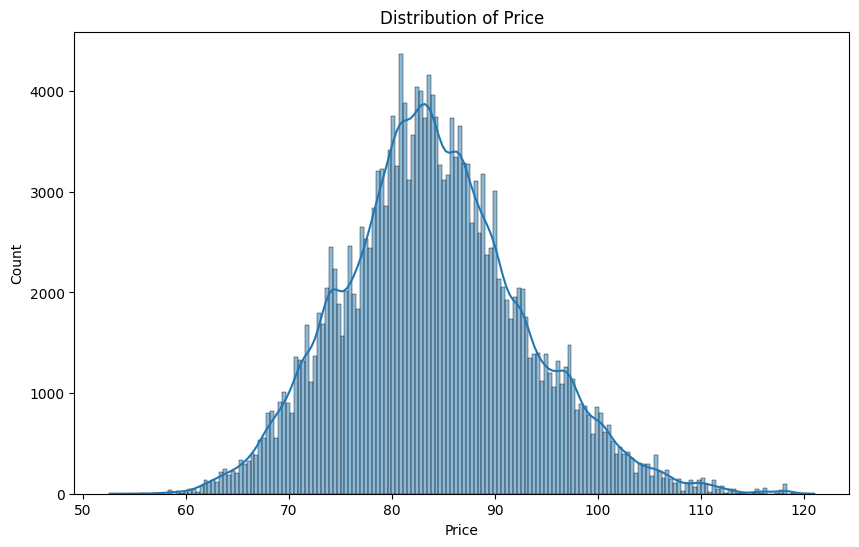

In [45]:
test['Price'] = y_pred
plt.figure(figsize=(10, 6))
sns.histplot(test['Price'], kde=True)
plt.title('Distribution of Price')
plt.show()

In [46]:
sample['Price'] = test['Price']
sample.to_csv('lgb_regressor_optuna.csv', index = False)

In [59]:
# Cell 1: Imports
import joblib
import os
from sklearn.preprocessing import StandardScaler
import optuna
import pandas as pd
from tqdm import tqdm
import lightgbm as lgb
import numpy as np
from sklearn.metrics import mean_squared_error

# Cell 2: Define objective and training functions
def objective(trial, X, y, n_folds=5):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 20, 50),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'random_state': 42
    }
    
    model = lgb.LGBMRegressor(**params)
    rmse_scores = []
    
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
        )
        
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)
    
    return np.mean(rmse_scores)

def train_enhanced_lightgbm(X, y, n_trials=20, study=None, start_trial=0):
    """
    Enhanced training function with checkpoint support
    """
    if study is None:
        study = optuna.create_study(direction='minimize')
    
    # Optimize hyperparameters
    study.optimize(
        lambda trial: objective(trial, X, y),
        n_trials=n_trials - start_trial  # Adjust remaining trials
    )
    
    # Get best parameters
    best_params = study.best_params
    print("Best parameters:", best_params)
    
    # Train final model with best parameters
    final_model = lgb.LGBMRegressor(**best_params)
    
    # Create progress bar
    epochs = best_params['n_estimators']
    pbar = tqdm(total=epochs, desc='Training final model')
    
    # Custom callback to update progress bar
    def callback(env):
        pbar.update(1)
        if env.iteration % 100 == 0:
            print(f"Iteration {env.iteration}")
    
    # Train final model
    final_model.fit(
        X, y,
        callbacks=[callback],
        early_stopping_rounds=50
    )
    
    pbar.close()
    return final_model

In [ ]:
from sklearn.model_selection import KFold
# Cell 3: Resume function
def resume_from_checkpoint(checkpoint_dir='model_checkpoints'):
    """Load the latest checkpoint and resume training"""
    try:
        # Get all checkpoint files
        checkpoints = sorted([f for f in os.listdir(checkpoint_dir) if f.startswith('checkpoint')])
        
        if not checkpoints:
            print("No checkpoints found.")
            return None, 0
        
        # Load the latest checkpoint
        latest_checkpoint = joblib.load(os.path.join(checkpoint_dir, checkpoints[-1]))
        print(f"Loaded checkpoint from trial {latest_checkpoint['trial_number']}")
        
        return latest_checkpoint['study'], latest_checkpoint['trial_number']
    
    except Exception as e:
        print(f"Error loading checkpoint: {str(e)}")
        return None, 0

# Cell 4: Scale features and resume training
# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

# Resume from checkpoint
study, start_trial = resume_from_checkpoint()

if study is None:
    # If no checkpoint, start new study
    study = optuna.create_study(direction='minimize')
    start_trial = 0

# Continue training
enhanced_model = train_enhanced_lightgbm(
    X_scaled, 
    y, 
    n_trials=20,  # Total number of trials
    study=study,  # Pass the loaded study
    start_trial=start_trial  # Start from the last completed trial
)

# Cell 5: Make predictions (if you have test data)
if 'test' in globals():  # Only run if test data exists
    test_scaled = pd.DataFrame(
        scaler.transform(test.drop(columns='id')),
        columns=test.drop(columns='id').columns
    )
    y_pred_enhance = enhanced_model.predict(test_scaled)

[I 2025-02-09 18:40:54,957] A new study created in memory with name: no-name-23e67588-9cc2-469b-b6e1-a9d7ac6bb6e1


Error loading checkpoint: [Errno 2] No such file or directory: 'model_checkpoints'


/tmp/ipykernel_11914/1795041770.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipykernel_11914/1795041770.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipykernel_11914/1795041770.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipykernel_11914/1795041770.py:22: FutureWarning: suggest_loguniform has been deprecated in

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27


[I 2025-02-09 18:41:09,057] Trial 0 finished with value: 39.033536681050975 and parameters: {'n_estimators': 719, 'learning_rate': 0.027145703358181977, 'num_leaves': 42, 'max_depth': 8, 'min_child_samples': 39, 'subsample': 0.6388083935431871, 'colsample_bytree': 0.6140292822029829, 'reg_alpha': 0.0012905050857499576, 'reg_lambda': 7.710238348211757e-08}. Best is trial 0 with value: 39.033536681050975.
/tmp/ipykernel_11914/1795041770.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipykernel_11914/1795041770.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27


[I 2025-02-09 18:41:17,230] Trial 1 finished with value: 39.014337673939494 and parameters: {'n_estimators': 479, 'learning_rate': 0.010255162484245867, 'num_leaves': 32, 'max_depth': 6, 'min_child_samples': 17, 'subsample': 0.7291769832036558, 'colsample_bytree': 0.7296492541932444, 'reg_alpha': 0.011533743087205575, 'reg_lambda': 2.3900817014312742e-05}. Best is trial 1 with value: 39.014337673939494.
/tmp/ipykernel_11914/1795041770.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipykernel_11914/1795041770.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27


[I 2025-02-09 18:41:20,314] Trial 2 finished with value: 39.0267424820287 and parameters: {'n_estimators': 167, 'learning_rate': 0.07995751763609606, 'num_leaves': 31, 'max_depth': 6, 'min_child_samples': 10, 'subsample': 0.8242932776729166, 'colsample_bytree': 0.7705505150591775, 'reg_alpha': 0.003370048393084001, 'reg_lambda': 4.6238213549751714e-05}. Best is trial 1 with value: 39.014337673939494.
/tmp/ipykernel_11914/1795041770.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipykernel_11914/1795041770.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27


[I 2025-02-09 18:41:31,500] Trial 3 finished with value: 39.0548965042002 and parameters: {'n_estimators': 962, 'learning_rate': 0.032482271018110846, 'num_leaves': 33, 'max_depth': 8, 'min_child_samples': 28, 'subsample': 0.8293203596846739, 'colsample_bytree': 0.873308074720064, 'reg_alpha': 0.020100054425181115, 'reg_lambda': 6.348551506198116e-06}. Best is trial 1 with value: 39.014337673939494.
/tmp/ipykernel_11914/1795041770.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipykernel_11914/1795041770.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6,

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27


[I 2025-02-09 18:41:42,688] Trial 4 finished with value: 39.01918900999939 and parameters: {'n_estimators': 837, 'learning_rate': 0.016087899571685115, 'num_leaves': 27, 'max_depth': 7, 'min_child_samples': 42, 'subsample': 0.6195869403875883, 'colsample_bytree': 0.6528660469063521, 'reg_alpha': 0.0006206486645035335, 'reg_lambda': 0.003499511056956321}. Best is trial 1 with value: 39.014337673939494.
/tmp/ipykernel_11914/1795041770.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipykernel_11914/1795041770.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-02-09 18:41:52,431] Trial 5 finished with value: 39.02903801969688 and parameters: {'n_estimators': 617, 'learning_rate': 0.02701932508011085, 'num_leaves': 42, 'max_depth': 5, 'min_child_samples': 38, 'subsample': 0.6839993598139636, 'colsample_bytree': 0.7256261372685073, 'reg_alpha': 0.0009178732432581684, 'reg_lambda': 2.7716585035303234e-08}. Best is trial 1 with value: 39.014337673939494.
/tmp/ipykernel_11914/1795041770.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipykernel_11914/1795041770.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-02-09 18:42:01,554] Trial 6 finished with value: 39.01595317997201 and parameters: {'n_estimators': 503, 'learning_rate': 0.016429855439190653, 'num_leaves': 48, 'max_depth': 5, 'min_child_samples': 32, 'subsample': 0.8078743549891352, 'colsample_bytree': 0.7883479214252999, 'reg_alpha': 3.187094776054482e-07, 'reg_lambda': 0.0711697333513832}. Best is trial 1 with value: 39.014337673939494.
/tmp/ipykernel_11914/1795041770.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipykernel_11914/1795041770.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6,

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27


[I 2025-02-09 18:42:07,748] Trial 7 finished with value: 39.01447297631795 and parameters: {'n_estimators': 342, 'learning_rate': 0.02294870206838463, 'num_leaves': 24, 'max_depth': 8, 'min_child_samples': 12, 'subsample': 0.647121357275118, 'colsample_bytree': 0.7175442000869688, 'reg_alpha': 8.50791422411751e-06, 'reg_lambda': 2.093157763593629e-05}. Best is trial 1 with value: 39.014337673939494.
/tmp/ipykernel_11914/1795041770.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipykernel_11914/1795041770.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6,

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-02-09 18:42:14,141] Trial 8 finished with value: 39.011081532002336 and parameters: {'n_estimators': 402, 'learning_rate': 0.025119356140273448, 'num_leaves': 27, 'max_depth': 4, 'min_child_samples': 24, 'subsample': 0.6154683221521843, 'colsample_bytree': 0.7711072293637369, 'reg_alpha': 0.0020105280893336895, 'reg_lambda': 0.23895665117198614}. Best is trial 8 with value: 39.011081532002336.
/tmp/ipykernel_11914/1795041770.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipykernel_11914/1795041770.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2025-02-09 18:42:19,312] Trial 9 finished with value: 39.04650106828004 and parameters: {'n_estimators': 265, 'learning_rate': 0.08941336343808322, 'num_leaves': 33, 'max_depth': 5, 'min_child_samples': 13, 'subsample': 0.7817154086605674, 'colsample_bytree': 0.8137663111616191, 'reg_alpha': 2.833125777623391e-05, 'reg_lambda': 3.898243121708152e-07}. Best is trial 8 with value: 39.011081532002336.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/tmp/ipykernel_11914/1795041770.py:16: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
/tmp/ipykernel_11914/1795041770.py:20: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.6, 0.9),
/tmp/ipykernel_11914/1795041770.py:21: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 0.9),
/tmp/ipykernel_11914/1795041770.py:22: FutureWarning: suggest_loguniform has been deprecated in

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 240000, number of used features: 27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 81.448481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,